# Comparison Example

In this notebook, we show some examples of comparisons between simulations of theoretical models and experimental data, being this the main goal of our software in the long term. 

This aspect of the NeuralPlayground (NPG) software is still under development. With time, we want to implement tools exclusively made to compare simulated and experimental data, such as a GUI to quickly navigate through the results, add more metrics to measure the performance of agents or similarity between neural representation.

For now, this notebook uses the three main modules of NPG, "experiments", "arenas" and "agents", to simulate theoretical models and compare with what is seen in neural recording from real experiments.  The "simulation manager" is used to run and keep track of the state of all of your runs and available results (For ease, the results of the simulations are saved on the gin repository and fetched). 
We use the gridscore metric implemented in the framework, to compare the performance of the different model implemented as well as direct visual comparison. 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import os
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.saved_models import fetch_model_path
from neuralplayground.plotting import make_plot_trajectories, make_plot_rate_map, make_agent_comparison

# Different Agents in Same environement

We compare two agents in the same environement and compare their neural representations. We will take the Successor Representation model (SR) by Stachenfeld et al. 2017, and a plasticity model from Weber et al. 2018, and compare it againts Sargolini et al. 2006. The runs have been previoulsy run using the simulation manager, the output was saved to the gin repositiory for ease.

**It might take a while to fetch trained models from [Gin](https://gin.g-node.org/SainsburyWellcomeCentre/NeuralPlayground), possibly enough time to make yourself a coffee**.

In [2]:
sr_data_path = fetch_model_path("stachenfeld_2018_in_sargolini2006")
weber_data_path = fetch_model_path("weber_2018_in_sargolini2006")

No we have both models locally, we can load them as using pickle package, the loaded variables correspond object instances of the trained agent and arena with their respective attributes and methods.

In [3]:
agent_sr = pd.read_pickle(os.path.join(sr_data_path, "agent"))
param_sr = pd.read_pickle(os.path.join(sr_data_path, "params.dict"))
env = pd.read_pickle(os.path.join(sr_data_path, "arena"))

print("agent_sr", agent_sr)
print("arena", env)

agent_sr <neuralplayground.agents.stachenfeld_2018.Stachenfeld2018 object at 0x7fa0eb0e21d0>
arena <Sargolini2006 instance>


You can ask for the documentation of any of these objects directly in the notebook by running, for example,
``` help(agent_sr) ``` to get the docstring with methods and attribute description

In [7]:
agent_weber = pd.read_pickle(os.path.join(weber_data_path, "agent"))
param_weber = pd.read_pickle(os.path.join(weber_data_path, "params.dict"))

print("agent_weber", agent_sr)

agent_weber <neuralplayground.agents.stachenfeld_2018.Stachenfeld2018 object at 0x7fa0eb0e21d0>


### Comparison function
Once you have a set of agents, arenas and experiments you'd like to compare, ideally you wouldn't want to write all to code from scratch to see your results. If these objects to compare follow the proper format, then one simple tool you can use is ``` make_agent_comparison ``` function, which will summarize the results, in this case, it is focused on grid cell representation of the two models we are using, but we hope to extend it to work on other phenomena (and make it more pretty as well). Let's see how to use this function and built its inputs accordingly...

In [5]:
help(make_agent_comparison)

Help on function make_agent_comparison in module neuralplayground.plotting.plot_utils:

make_agent_comparison(envs, parameters, agents, exps=None, recording_index=None, tetrode_id=None, GridScorer=None)
    Plot function to compare agents in a given environment
    
    Parameters
    ----------
    envs:
        Arena environment where the agent was trained and tested
    parameters:
        List of dictionaries with the parameters of the environment and agent
    agents:
        List of agents to compare
    exp:
        Objects of the class Experiment to compare with the agent
        If None, the experimental data is will be searched in the environment
    recording_index: int
        Index of the recording to plot
    tetrode_id:
        Tetrode id to plot, as in Hafting and Sargolini experiment classes
    GridScorer:
        Object of the class Gridscore (or custom gridscore routine) to compute the grid scores
    
    Returns
    -------
    ax: mpl.axes._subplots.AxesSubplot (

In [8]:
# We format our agents and parameters in lists
agents = [agent_sr, agent_weber]
parameters = [param_sr, param_weber]

# Let's use an experimental class directly and give it to the function
exp = Sargolini2006Data(verbose=False)
env = [env, ]

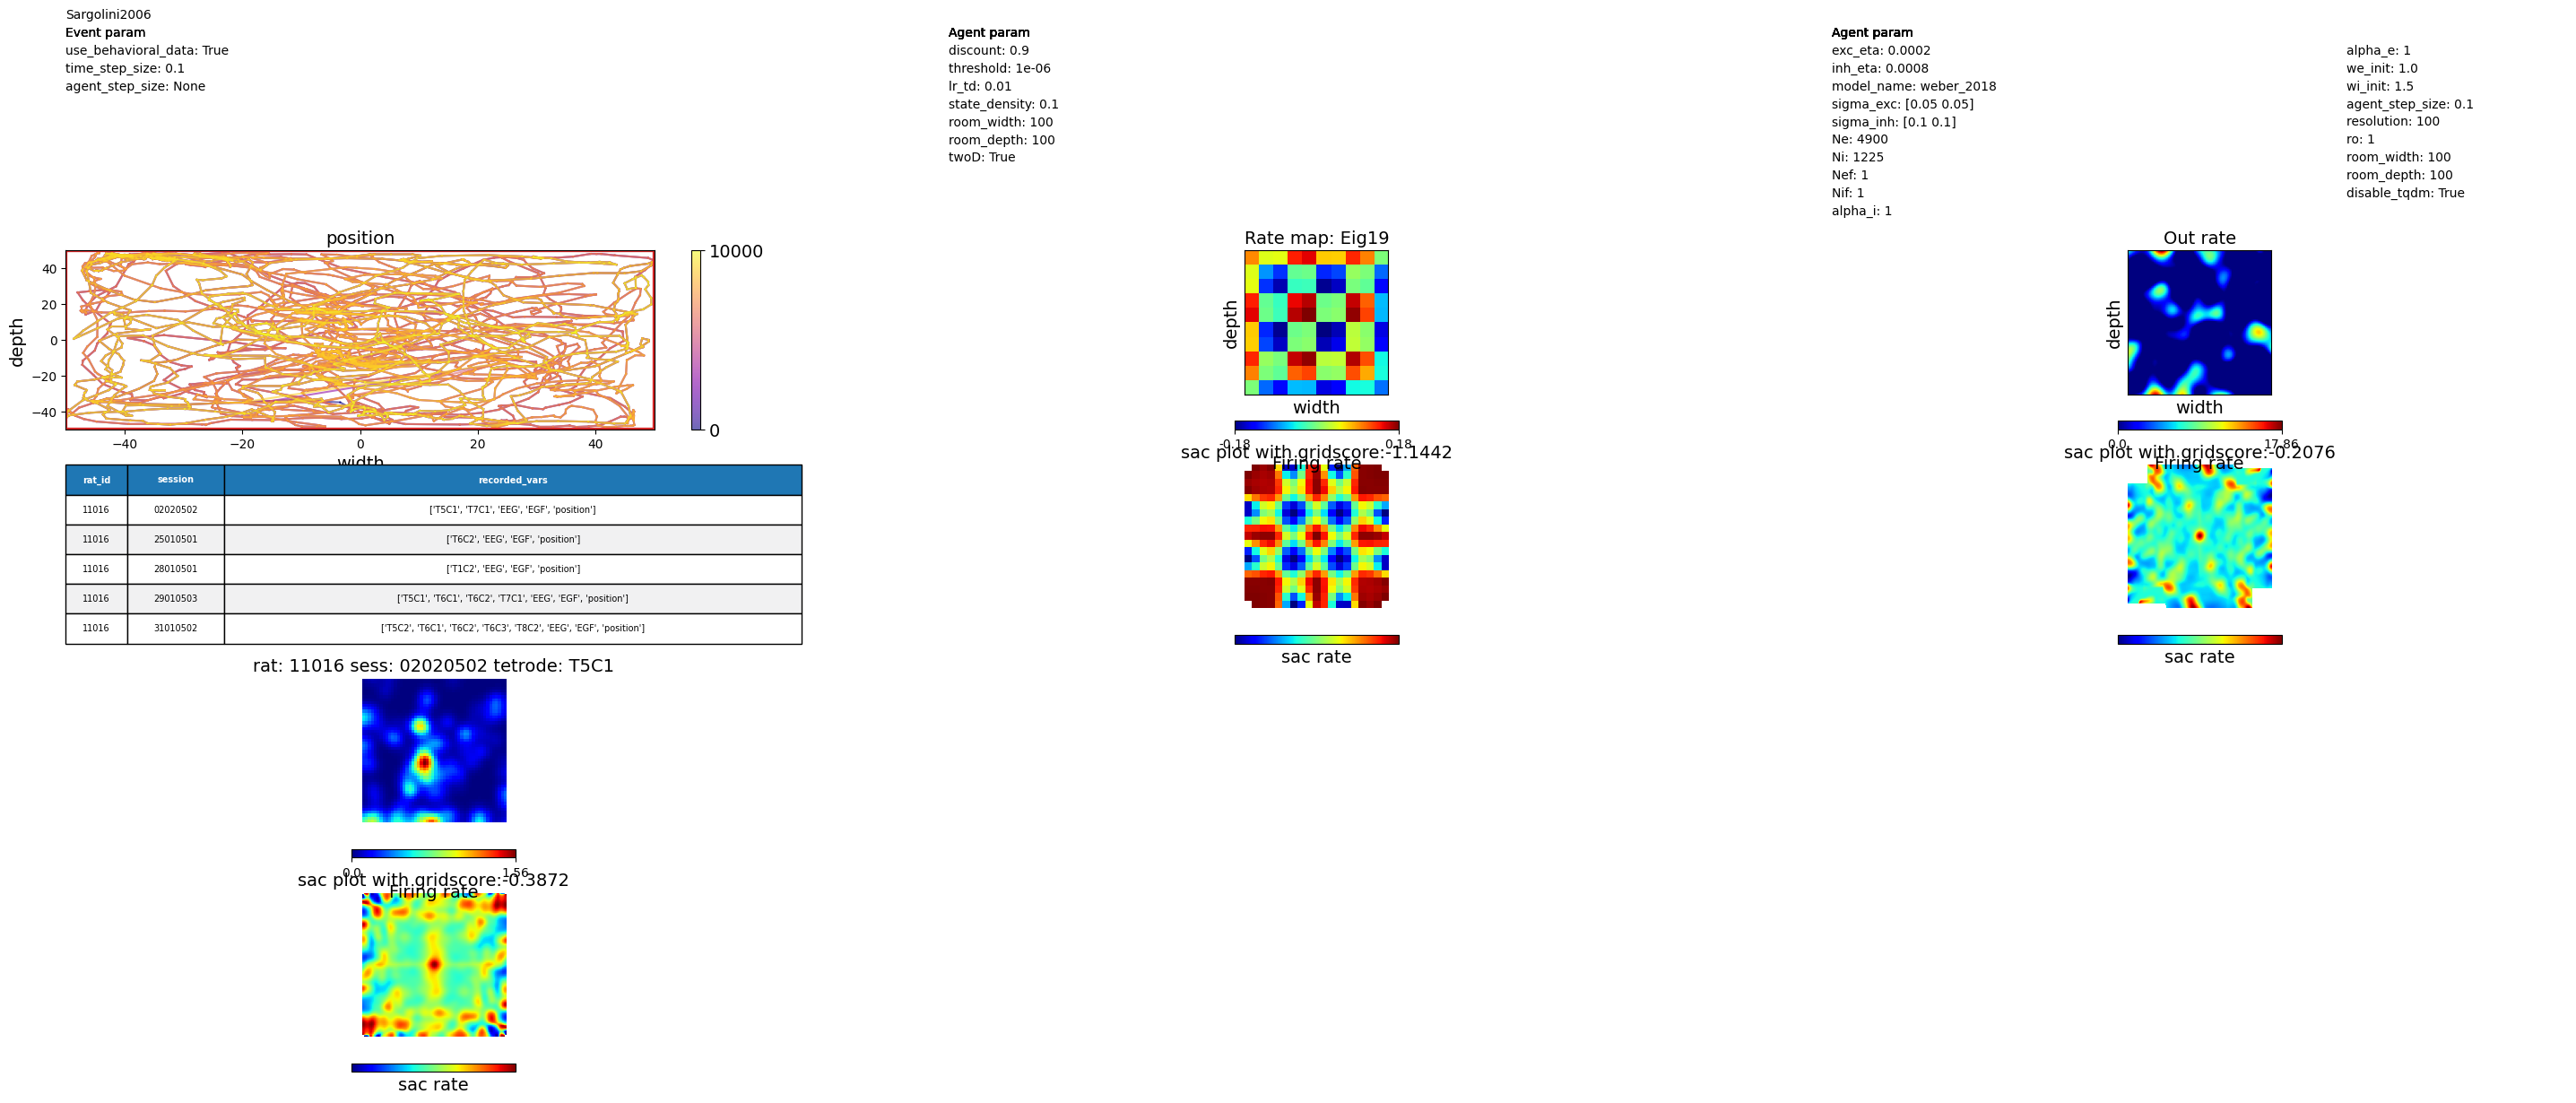

In [10]:
ax = make_agent_comparison(env, parameters, agents, recording_index=0, GridScorer=GridScorer)